In [73]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
sns.set(style="whitegrid", color_codes=True)

In [99]:
# Load the provided dataset
sales_data = pd.read_excel('milk-day-sales.xlsx')
sales_data.head(), sales_data.tail(), sales_data.to_json(orient="records")

(        date  sales
 0 2021-05-13    676
 1 2021-05-14    667
 2 2021-05-15    372
 3 2021-05-16    259
 4 2021-05-17    270,
           date  sales
 146 2021-10-08    422
 147 2021-10-09    381
 148 2021-10-10    508
 149 2021-10-11    369
 150 2021-10-12    361,
 '[{"date":1620864000000,"sales":676},{"date":1620950400000,"sales":667},{"date":1621036800000,"sales":372},{"date":1621123200000,"sales":259},{"date":1621209600000,"sales":270},{"date":1621296000000,"sales":139},{"date":1621382400000,"sales":298},{"date":1621468800000,"sales":304},{"date":1621555200000,"sales":243},{"date":1621641600000,"sales":293},{"date":1621728000000,"sales":227},{"date":1621814400000,"sales":103},{"date":1621900800000,"sales":428},{"date":1621987200000,"sales":462},{"date":1622073600000,"sales":309},{"date":1622160000000,"sales":374},{"date":1622246400000,"sales":196},{"date":1622332800000,"sales":266},{"date":1622419200000,"sales":163},{"date":1622505600000,"sales":317},{"date":1622592000000,"sales":2

In [75]:
sales_data = sales_data.set_index('date')  # Set the time variable as an index
# sales_data.index =  pd.date_range(start=sales_data.index[0] , periods=len(sales_data), freq='D')

In [76]:
sales_data_train = sales_data.iloc[-60:, :] # Train set
sales_data_test = sales_data.iloc[-7:, :] # Test set for validation

sales_data_train.index = pd.date_range(start=sales_data_train.index[0] , periods=len(sales_data_train), freq='D')
sales_data_test.index = pd.date_range(start=sales_data_test.index[0] , periods=len(sales_data_test), freq='D')
sales_data_train.shape, sales_data_test.shape

((60, 1), (7, 1))

In [77]:
sales_data_test['sales']

2021-10-06     33
2021-10-07     25
2021-10-08    422
2021-10-09    381
2021-10-10    508
2021-10-11    369
2021-10-12    361
Freq: D, Name: sales, dtype: int64

In [78]:
sales_data_train['sales']

2021-08-14     337
2021-08-15     288
2021-08-16     454
2021-08-17     565
2021-08-18     427
2021-08-19     373
2021-08-20     414
2021-08-21     500
2021-08-22     381
2021-08-23     306
2021-08-24     484
2021-08-25     404
2021-08-26     408
2021-08-27     296
2021-08-28     525
2021-08-29     399
2021-08-30     147
2021-08-31     312
2021-09-01     345
2021-09-02     267
2021-09-03     319
2021-09-04     534
2021-09-05     264
2021-09-06     164
2021-09-07     699
2021-09-08     576
2021-09-09     504
2021-09-10     427
2021-09-11     876
2021-09-12     762
2021-09-13     307
2021-09-14    1118
2021-09-15     846
2021-09-16     631
2021-09-17     510
2021-09-18     478
2021-09-19     463
2021-09-20     404
2021-09-21     350
2021-09-22    1263
2021-09-23     774
2021-09-24     625
2021-09-25     599
2021-09-26     441
2021-09-27     454
2021-09-28     570
2021-09-29     563
2021-09-30     583
2021-10-01     472
2021-10-02     214
2021-10-03     348
2021-10-04     448
2021-10-05  

In [79]:
# Import the relevant libraries
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

sales_data_train = pd.Series(sales_data_train['sales']).astype('float64')
# sales_data_train = pd.Series(sales_data_test['sales']).astype('float64')
ets_model = ETSModel(sales_data_train, error='mul', trend='add', seasonal = 'mul',
                     damped_trend=True, seasonal_periods=7, initial_level=sales_data_train.values.mean(), freq='D')
ets_fitted = ets_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  7.26317D+00    |proj g|=  1.40328D+00

At iterate    1    f=  7.11471D+00    |proj g|=  1.04463D+00

At iterate    2    f=  6.92348D+00    |proj g|=  8.93253D-01

At iterate    3    f=  6.79128D+00    |proj g|=  6.81952D-01

At iterate    4    f=  6.71114D+00    |proj g|=  3.34639D-01

At iterate    5    f=  6.66681D+00    |proj g|=  1.70771D-01

At iterate    6    f=  6.64758D+00    |proj g|=  6.08481D-02

At iterate    7    f=  6.63932D+00    |proj g|=  4.97184D-02

At iterate    8    f=  6.63345D+00    |proj g|=  6.06942D-02

At iterate    9    f=  6.61945D+00    |proj g|=  1.21007D-01

At iterate   10    f=  6.61053D+00    |proj g|=  8.34738D-02

At iterate   11    f=  6.60456D+00    |proj g|=  2.89996D-02

At iterate   12    f=  6.60441D+00    |proj g|=  2.82722D-02

At iterate   13    f=  6.6

In [80]:
print(ets_fitted.summary())

                                 ETS Results                                  
Dep. Variable:                  sales   No. Observations:                   60
Model:                      ETS(MAdM)   Log Likelihood                -396.027
Date:                Wed, 22 Dec 2021   AIC                            820.054
Time:                        17:51:05   BIC                            849.375
Sample:                    08-14-2021   HQIC                           831.523
                         - 10-12-2021   Scale                            0.165
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.1398        nan        nan        nan         nan         nan
smoothing_trend     1.398e-05        nan        nan        nan         nan         nan
smoothing_seasonal  

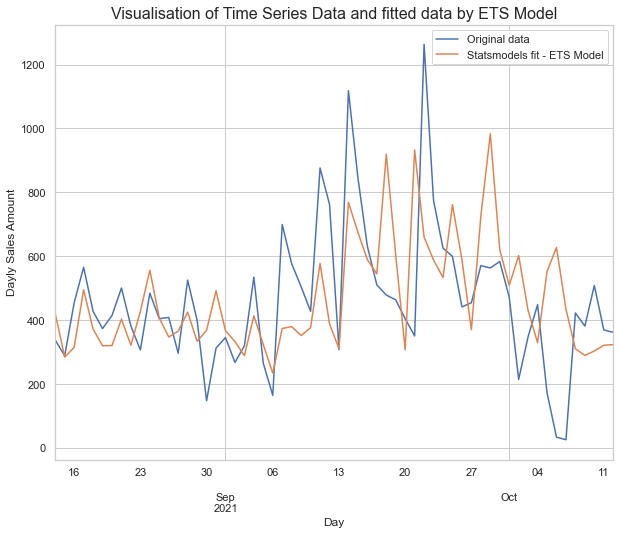

In [81]:
plt.figure(figsize=(10,8))
sales_data_train.plot(label='Original data')
ets_fitted.fittedvalues.plot(label='Statsmodels fit - ETS Model')
plt.title('Visualisation of Time Series Data and fitted data by ETS Model' , fontsize=16)
plt.ylabel("Dayly Sales Amount");
plt.xlabel("Day")
plt.legend()

In [82]:
ets_fitted.predict(start='2021/10/10',end='2021/10/30')

2021-10-10    302.811601
2021-10-11    320.704635
2021-10-12    322.952916
2021-10-13    336.264726
2021-10-14    269.280675
2021-10-15    438.527572
2021-10-16    384.031294
2021-10-17    427.671438
2021-10-18    352.117290
2021-10-19    343.203402
2021-10-20    336.255334
2021-10-21    269.274185
2021-10-22    438.518452
2021-10-23    384.024402
2021-10-24    427.664816
2021-10-25    352.112585
2021-10-26    343.199445
2021-10-27    336.251988
2021-10-28    269.271873
2021-10-29    438.515204
2021-10-30    384.021947
Freq: D, dtype: float64

In [83]:
# ETS Model for Validation
sales_data_test = pd.Series(sales_data_test['sales']).astype('float64')
ets_model_holdout = ETSModel(sales_data_test, error='mul', trend='add', seasonal = None,
                             damped_trend=True, seasonal_periods=None,
                             initial_level=sales_data_train.values.mean(), freq='D')
ets_fitted_holdout = ets_model_holdout.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  7.87496D+00    |proj g|=  1.80000D-01

At iterate    1    f=  7.40073D+00    |proj g|=  7.52481D-02

At iterate    2    f=  7.30388D+00    |proj g|=  4.20597D-02

At iterate    3    f=  7.29828D+00    |proj g|=  9.88261D-01

At iterate    4    f=  7.28789D+00    |proj g|=  9.83725D-01

At iterate    5    f=  7.27993D+00    |proj g|=  7.20887D-01

At iterate    6    f=  7.27416D+00    |proj g|=  2.55616D-02

At iterate    7    f=  7.26572D+00    |proj g|=  4.35811D-01

At iterate    8    f=  7.24187D+00    |proj g|=  9.85720D-01

At iterate    9    f=  7.17192D+00    |proj g|=  9.88717D-01

At iterate   10    f=  7.05003D+00    |proj g|=  9.90557D-01

At iterate   11    f=  6.43563D+00    |proj g|=  1.80000D-01

At iterate   12    f=  6.41941D+00    |proj g|=  7.68249D-02

At iterate   13    f=  6.4

In [84]:
# Predicted values for holdout samples (test samples) - ETS model
# ets_fitted_holdout.predict()[-60:]

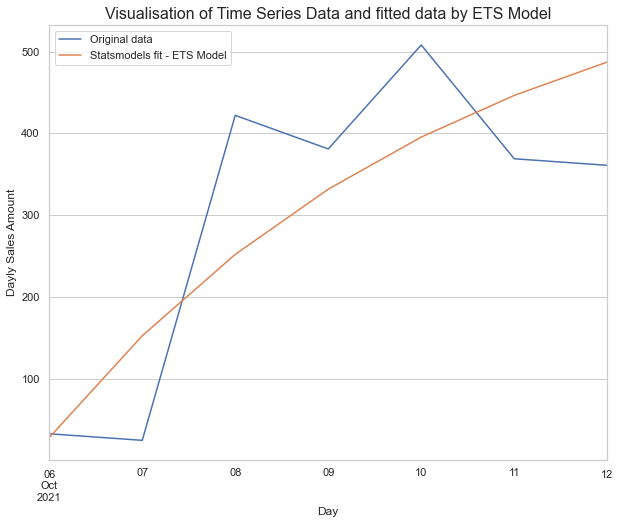

In [85]:
plt.figure(figsize=(10,8))
sales_data_test.plot(label='Original data')
ets_fitted_holdout.fittedvalues.plot(label='Statsmodels fit - ETS Model')
plt.title('Visualisation of Time Series Data and fitted data by ETS Model' , fontsize=16)
plt.ylabel("Dayly Sales Amount");
plt.xlabel("Day")
plt.legend()

In [86]:
ets_fitted_holdout.predict(start='2021/10/10',end='2021/10/30')

2021-10-10    395.489270
2021-10-11    446.436239
2021-10-12    487.177069
2021-10-13    519.763310
2021-10-14    545.842396
2021-10-15    566.705665
2021-10-16    583.396281
2021-10-17    596.748773
2021-10-18    607.430767
2021-10-19    615.976362
2021-10-20    622.812838
2021-10-21    628.282018
2021-10-22    632.657363
2021-10-23    636.157639
2021-10-24    638.957859
2021-10-25    641.198036
2021-10-26    642.990177
2021-10-27    644.423890
2021-10-28    645.570860
2021-10-29    646.488437
2021-10-30    647.222498
Freq: D, dtype: float64

In [87]:
holdout_results = pd.DataFrame({
                                 'ets_holdout': ets_fitted_holdout.predict(start='2021/10/10',end='2021/10/30'),
                                 'ets': ets_fitted.predict(start='2021/10/10',end='2021/10/30') },
                               index = pd.date_range('2021/10/10', periods=20))
holdout_results

,ets_holdout,ets
2021-10-10,395.489270,302.811601
2021-10-11,446.436239,320.704635
2021-10-12,487.177069,322.952916
2021-10-13,519.763310,336.264726
2021-10-14,545.842396,269.280675
2021-10-15,566.705665,438.527572
2021-10-16,583.396281,384.031294
2021-10-17,596.748773,427.671438
2021-10-18,607.430767,352.117290
2021-10-19,615.976362,343.203402


In [88]:
holdout_results['forecast'] = holdout_results['ets']*0.4 + holdout_results['ets_holdout']*0.6

holdout_results

,ets_holdout,ets,forecast
2021-10-10,395.489270,302.811601,358.418203
2021-10-11,446.436239,320.704635,396.143598
2021-10-12,487.177069,322.952916,421.487408
2021-10-13,519.763310,336.264726,446.363876
2021-10-14,545.842396,269.280675,435.217708
2021-10-15,566.705665,438.527572,515.434428
2021-10-16,583.396281,384.031294,503.650286
2021-10-17,596.748773,427.671438,529.117839
2021-10-18,607.430767,352.117290,505.305376
2021-10-19,615.976362,343.203402,506.867178


In [89]:
results = pd.DataFrame({
                                 'forecast': holdout_results['forecast'] },
                               index = holdout_results.index)
results

,forecast
2021-10-10,358.418203
2021-10-11,396.143598
2021-10-12,421.487408
2021-10-13,446.363876
2021-10-14,435.217708
2021-10-15,515.434428
2021-10-16,503.650286
2021-10-17,529.117839
2021-10-18,505.305376
2021-10-19,506.867178
